In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
rcParams['figure.figsize']=(12,6)

In [2]:
import pandas as pd

In [3]:
import tables

In [4]:
h5 = tables.open_file('/artemis/readout/adr_logs/standby_logs.h5')

In [9]:
h5.root.logs.block0_items[:]

array(['921_R', '922_1_V', '922_2_V', '922_3_V', '922_4_V', '923A1_R',
       '923A2_R', '960V', 'ADR 1K', 'ADR 50mK', 'Auxiliary', 'Current',
       'H20 Inlet Temp', 'H20 Outlet Temp', 'Helium Temp',
       'High Side Press', 'Log Comments', 'Low Side Press', 'Magnet Diode',
       'Magnet RTD', 'Oil Temp', 'PS_I', 'PS_V', 'PT 3K', 'PT 60K',
       'Pressure', 'RLeads', 'Test Time', 'Tset'], 
      dtype='|S15')

In [15]:
current = h5.root.logs.block0_values[::60,11]

In [16]:
current.shape

(660848,)

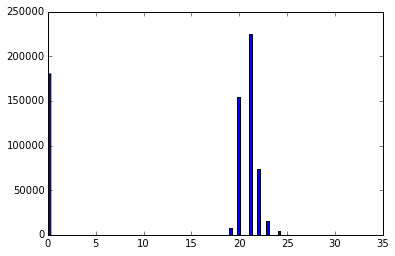

In [19]:
blah = hist(current,bins=100)

In [20]:
p5=pd.HDFStore('/artemis/readout/adr_logs/standby_logs.h5',mode='r')

In [21]:
df = p5['logs']

In [22]:
df.shape

(39650850, 29)

In [23]:
df.columns

Index([u'921_R', u'922_1_V', u'922_2_V', u'922_3_V', u'922_4_V', u'923A1_R',
       u'923A2_R', u'960V', u'ADR 1K', u'ADR 50mK', u'Auxiliary', u'Current',
       u'H20 Inlet Temp', u'H20 Outlet Temp', u'Helium Temp',
       u'High Side Press', u'Log Comments', u'Low Side Press', u'Magnet Diode',
       u'Magnet RTD', u'Oil Temp', u'PS_I', u'PS_V', u'PT 3K', u'PT 60K',
       u'Pressure', u'RLeads', u'Test Time', u'Tset'],
      dtype='object')

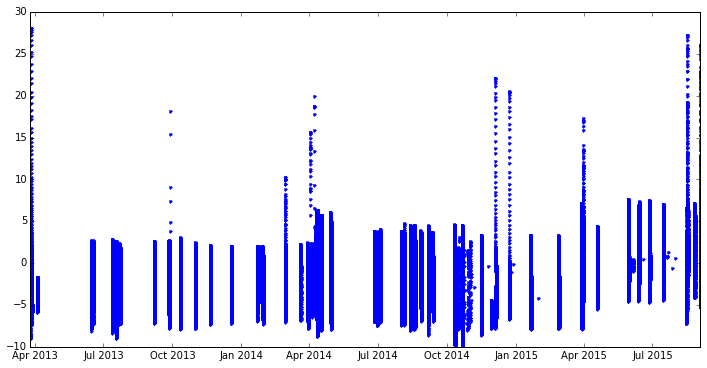

In [29]:
on = df[df.Current>22]
plot(on.index,on['Oil Temp']-on['H20 Outlet Temp'],'.')

In [40]:
df.sort(inplace=True)

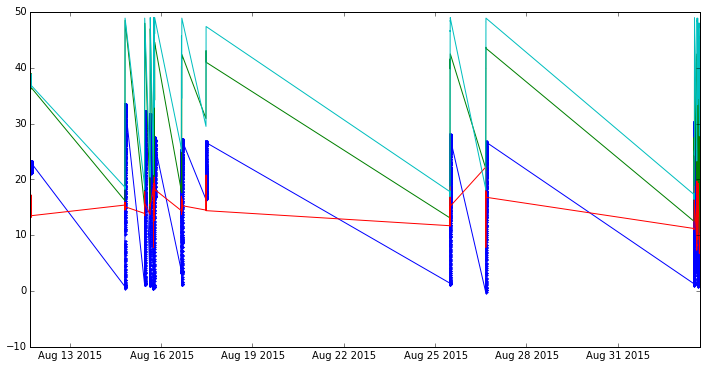

In [58]:
on = df[df.Current>=20].iloc[-10000:]
plot(on.index,on['H20 Outlet Temp']-on['H20 Inlet Temp'],'.-')
plot(on.index,on['H20 Outlet Temp'])
plot(on.index,on['H20 Inlet Temp'])
plot(on.index,on['Oil Temp'])


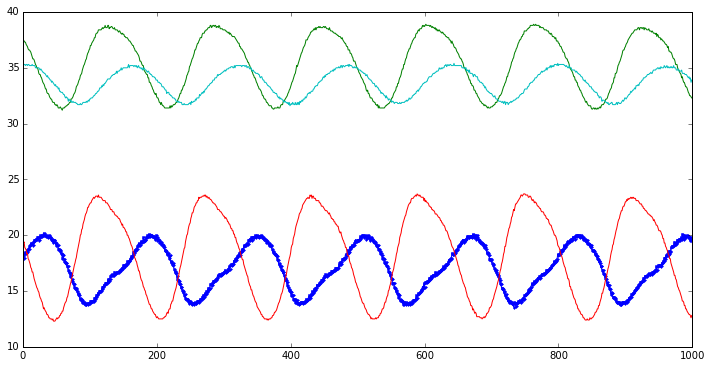

In [51]:
on = df[df.Current>0].iloc[0:2000000].iloc[-1000:]
plot(on['H20 Outlet Temp']-on['H20 Inlet Temp'],'.-')
plot(on['H20 Outlet Temp'])
plot(on['H20 Inlet Temp'])
plot(on['Oil Temp'])


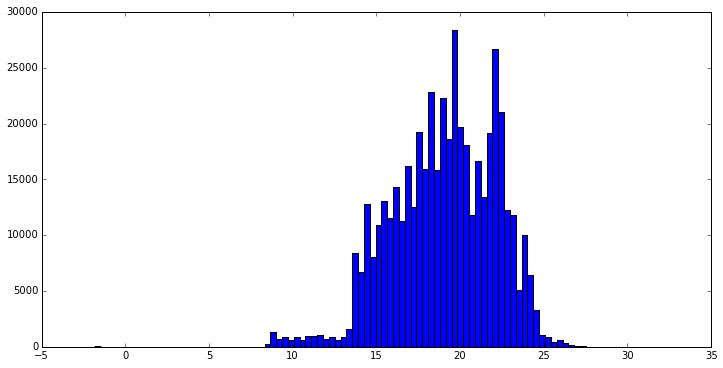

In [37]:
blah=hist(on['H20 Outlet Temp']-on['H20 Inlet Temp'],bins=100)

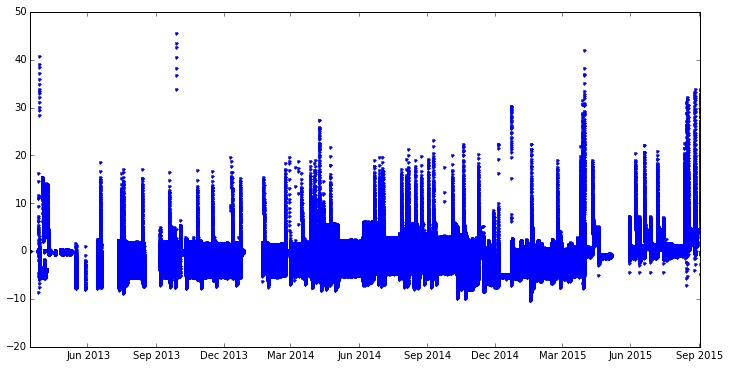

In [35]:
on = df.iloc[::60]
plot(on.index,on['Oil Temp']-on['H20 Outlet Temp'],'.')

In [60]:
df.to_hdf('/artemis/readout/adr_logs/standby_logs_sorted.h5','logs')